Step 1. Import Library and Read Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/refs/heads/master/Datasets/house_sales_data.csv", header=0,
                 sep = ',')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Step 2. Data Wrangling
    
    * Is there any null value ?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Step 3. Assumptions of Linear Regression Model

    * Is label Normally Distributed ?

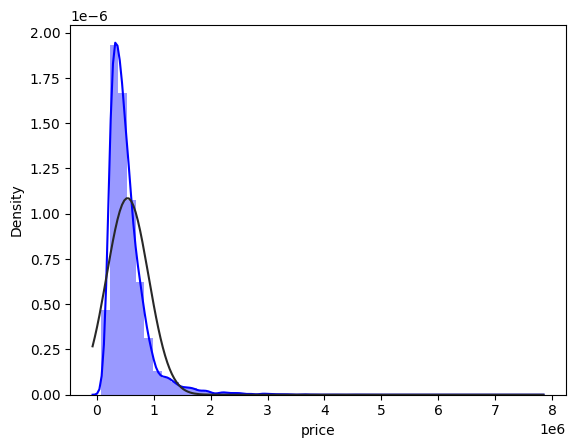

In [7]:
from scipy.stats import norm
sns.distplot(df['price'], color = 'blue', fit = norm)
plt.show()

Plot Outliers

<Axes: xlabel='price'>

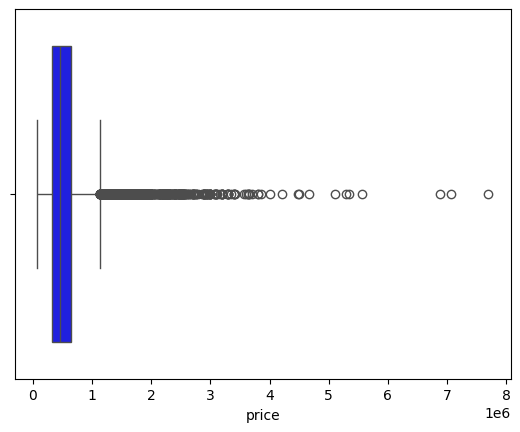

In [8]:
sns.boxplot(df['price'], color = 'b', orient = 'h')

Step 4. Removing Outliers

In [9]:
house_df = df.drop(['id','date'], axis = 1)

In [10]:
from scipy.stats import zscore
z = np.abs(zscore(house_df))

In [11]:
np.where((z > 3))

(array([    1,     5,     5, ..., 21590, 21590, 21600]),
 array([13,  2,  3, ..., 11, 17, 10]))

In [12]:
len(np.where((z > 4))[0]) / house_df.shape[0] * 100

11.696664044787859

In [13]:
house_df1 = house_df.drop(np.where((z > 4))[0])

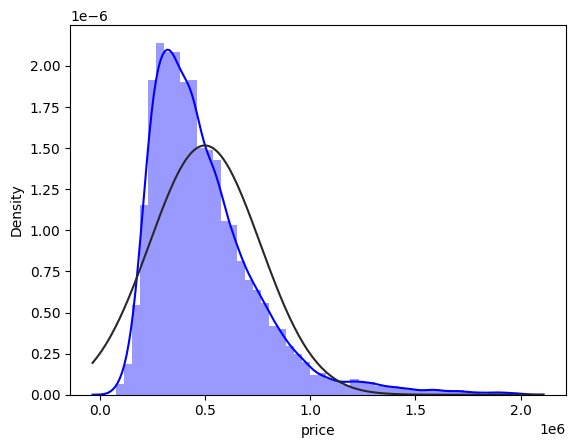

In [14]:
sns.distplot(house_df1['price'], color = 'blue', fit = norm)
plt.show()

Step 5. Is there any multi-collinearity ?

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = house_df1.drop(['price'],axis = 1)
x = x.astype(float)
# empty dataframe
vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [16]:
vif_data

,features,VIF
0,bedrooms,2.707209e+01
1,bathrooms,2.977222e+01
2,sqft_living,inf
3,sqft_lot,4.314193e+00
4,floors,1.780241e+01
5,waterfront,NaN
6,view,1.214920e+00
7,condition,3.496161e+01
8,grade,1.538437e+02
9,sqft_above,inf


Step 6. Select Features and Label

In [17]:
X = house_df1.drop(['sqft_living','waterfront','sqft_above','sqft_basement','yr_renovated','zipcode','long','price'], axis = 1)
Y = house_df1['price']

Step 7. Cross Validation
    
    * Split Data into train & test split.

In [21]:
from sklearn.model_selection import train_test_split
# test_size = 20% and train_size = 80%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [32]:
x_train

,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,yr_built,lat,sqft_living15,sqft_lot15
15783,4,2.00,10735,1.5,0,3,7,1967,47.6899,1570,9540
14611,3,2.50,54059,2.0,0,3,10,1987,47.4664,2910,49658
1779,3,1.00,5400,1.0,0,4,7,1940,47.7115,1429,5400
18616,4,2.50,11511,2.0,0,3,8,1992,47.3886,1900,8961
9629,4,2.00,7552,1.0,0,4,7,1977,47.7765,1410,7199
...,...,...,...,...,...,...,...,...,...,...,...
14365,3,1.00,9035,1.0,0,4,7,1970,47.2750,1350,10425
21443,1,1.50,1688,2.0,0,3,8,2007,47.5490,1380,2059
10760,3,2.50,5082,2.0,0,3,7,2004,47.5297,2480,5874
11809,3,2.25,4322,2.0,0,3,7,1985,47.5672,1610,4322


Step 8. Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
# initialize model
lr_model = LinearRegression()

In [23]:
# fit linear regression model
lr_model.fit(x_train, y_train)

LinearRegression()

In [25]:
# R-Squared Score (0-1)
lr_model.score(x_test, y_test)

0.6908758659042751

In [33]:
lr_model.coef_

array([ 5.48225799e+03,  6.74311434e+04,  5.51354587e-01,  3.03937984e+04,
        4.40796332e+04,  3.05589689e+04,  1.14705517e+05, -2.59593706e+03,
        5.41463237e+05,  8.42774888e+01, -8.38898472e-01])

In [34]:
lr_model.intercept_

-21479320.999301106

#### Step 9. Regression Metrics

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
y_pred = lr_model.predict(x_test)

In [29]:
# mean_squared_error (MSE)
mean_squared_error(y_test, y_pred)

20316311666.670364

In [30]:
# RMSE - Root Mean Square Error
np.sqrt(mean_squared_error(y_test, y_pred))

142535.29972140363

In [31]:
# R-Squared (R2) - Coeff of Determination, R2 is statistical measure for regression model which determines proportional of variance
# in the depedent variable (Y) that can be explained by independent variable (X)
r2_score(y_test, y_pred)

0.6908758659042751

#### Step 10. Visulaize Model Prediction & Actual Label

In [40]:
result = pd.DataFrame(y_pred, columns = ['Prediction'])

In [46]:
result['Actual'] = y_test.values

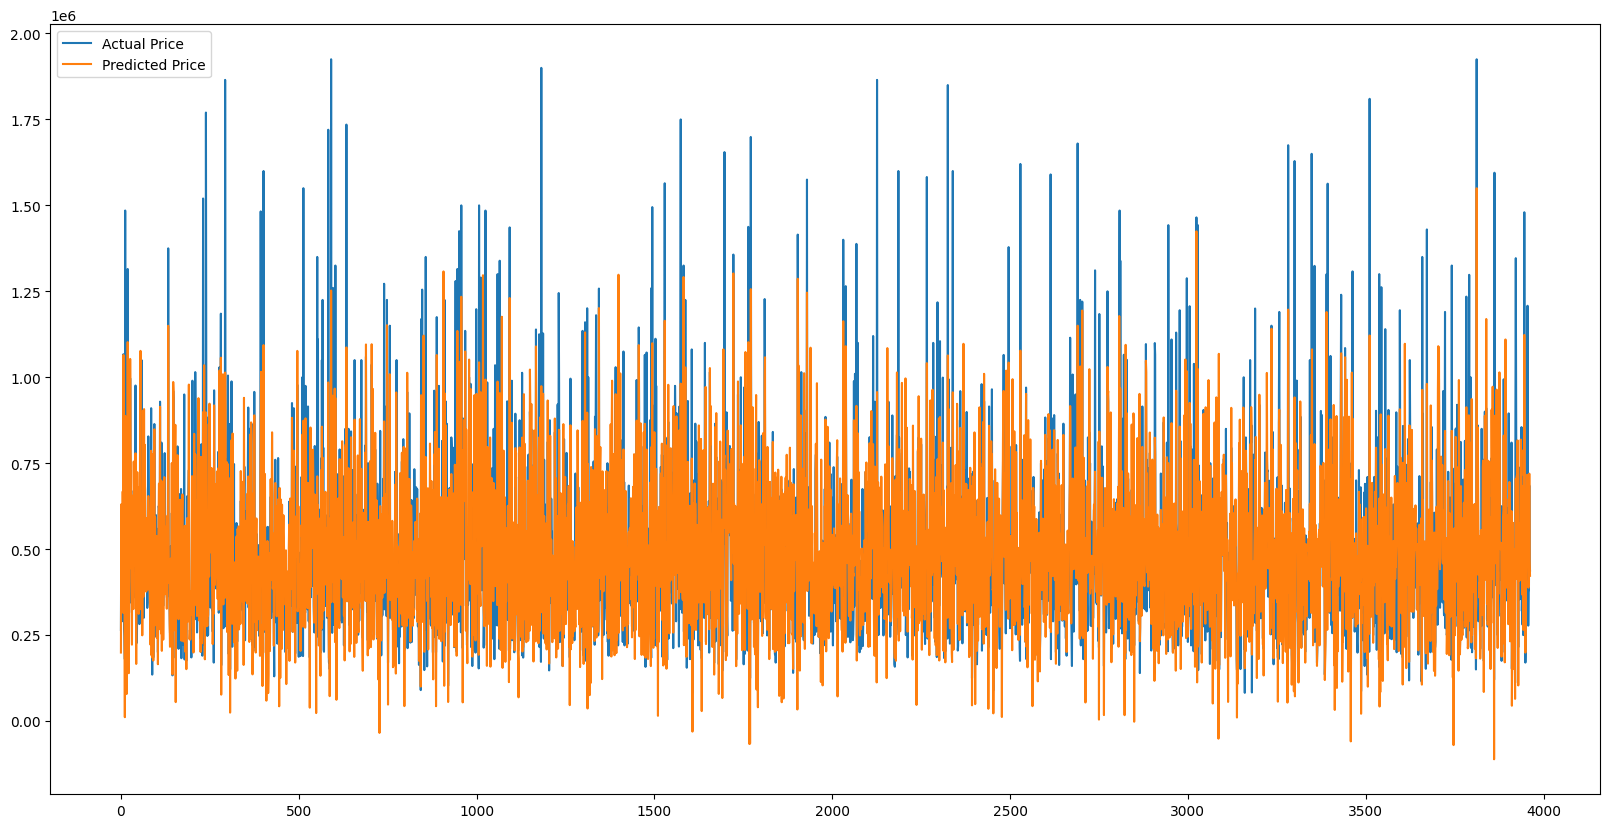

In [53]:
plt.figure(figsize = (20,10))
plt.plot(result['Actual'], label = "Actual Price")
plt.plot(result['Prediction'], label = "Predicted Price")
plt.legend()
plt.show()

In [45]:
y_test.values

array([265000., 590000., 359500., ..., 685000., 457000., 438000.])